# SmartBeds - Análisis de componentes principales

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plt
import mpl_toolkits.mplot3d #Matplotlib 3d
import pickle as pk #Pikcle as pk
import gc #Garbage colector

### Lectura de datos

In [2]:
with open('datos.pdd','rb') as f:
    datos = pk.load(f)
    
with open('datosE.pdd','rb') as f:
    dataE = pk.load(f)

### Componentes principales

In [3]:
from sklearn.decomposition import PCA
from loadData import normalize

#### Datos Brutos

In [14]:
data = datos.iloc[:,1:len(datos.columns)-1]
data.head()

,P1,P2,P3,P4,P5,P6
4041041,0.0,27.937363,30.307803,22.880790,0.0,0.0
4041042,0.0,27.906098,30.321736,22.997895,0.0,0.0
4041043,0.0,27.855428,30.323693,23.103310,0.0,0.0
4041044,0.0,27.786699,30.315115,23.197355,0.0,0.0
4041045,0.0,27.701287,30.297382,23.280341,0.0,0.0


In [15]:
pcaB = PCA(n_components=2).fit_transform(data)

Text(0.5, 1.0, 'PCA Raw')

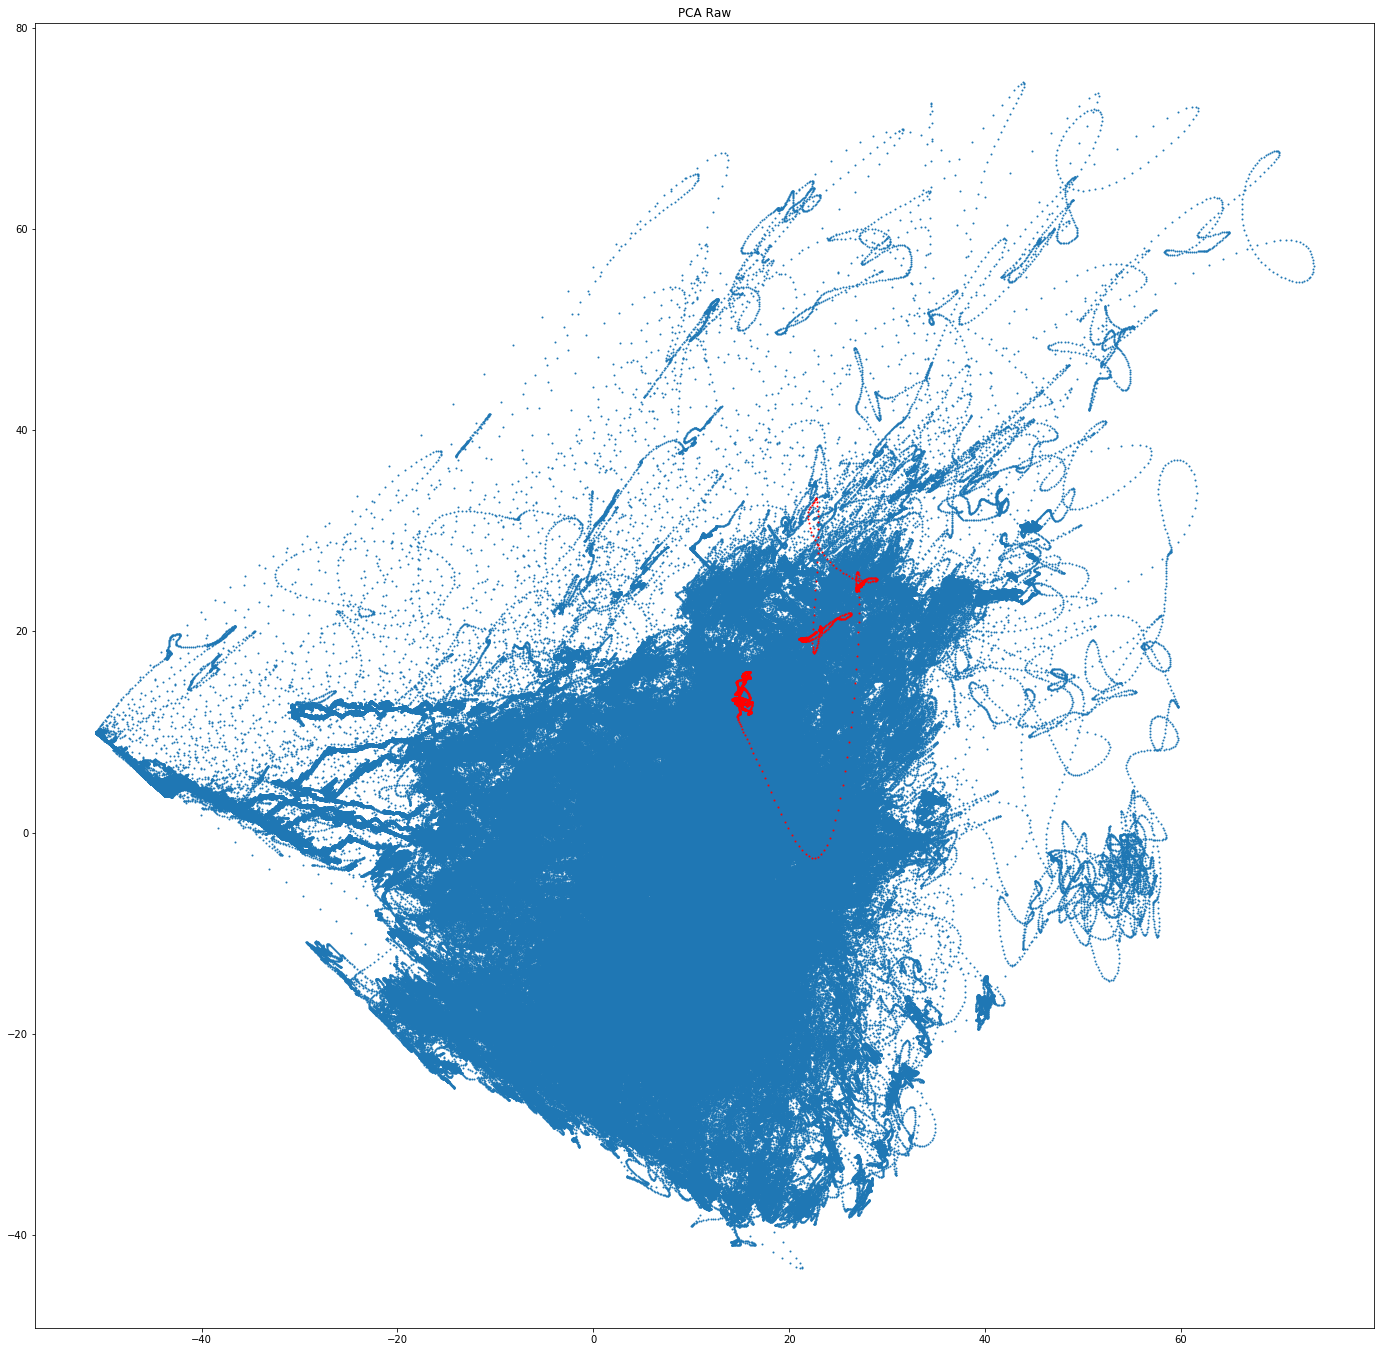

In [5]:
plt.figure(figsize=(24,24))
pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('PCA Raw')

#### Datos Estadísticos Móviles

In [16]:
datosE = dataE
datosE = datosE.iloc[:,len(datos.columns):]
medias = datosE.iloc[:,0:int(len(datosE.columns)/2)]
desv = datosE.iloc[:,int(len(datosE.columns)/2):]

desv = normalize(desv)
datosE = pd.concat((medias,desv*100),axis=1)
datosE.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
4041065,0.0,26.400677,29.826624,23.299152,0.0,0.0,0.0,7.362473,2.364341,1.016972,0.0,0.0
4041066,0.0,26.250357,29.770323,23.295851,0.0,0.0,0.0,7.574539,2.494349,1.047198,0.0,0.0
4041067,0.0,26.095660,29.710582,23.284963,0.0,0.0,0.0,7.734452,2.606185,1.135451,0.0,0.0
4041068,0.0,25.937780,29.648037,23.267094,0.0,0.0,0.0,7.842223,2.699663,1.257524,0.0,0.0
4041069,0.0,25.777864,29.583271,23.242863,0.0,0.0,0.0,7.898377,2.774830,1.393529,0.0,0.0


In [17]:
pcaM = PCA(n_components=2).fit_transform(medias)
pcaD = PCA(n_components=2).fit_transform(desv)
pcaMD = PCA(n_components=2).fit_transform(datosE)

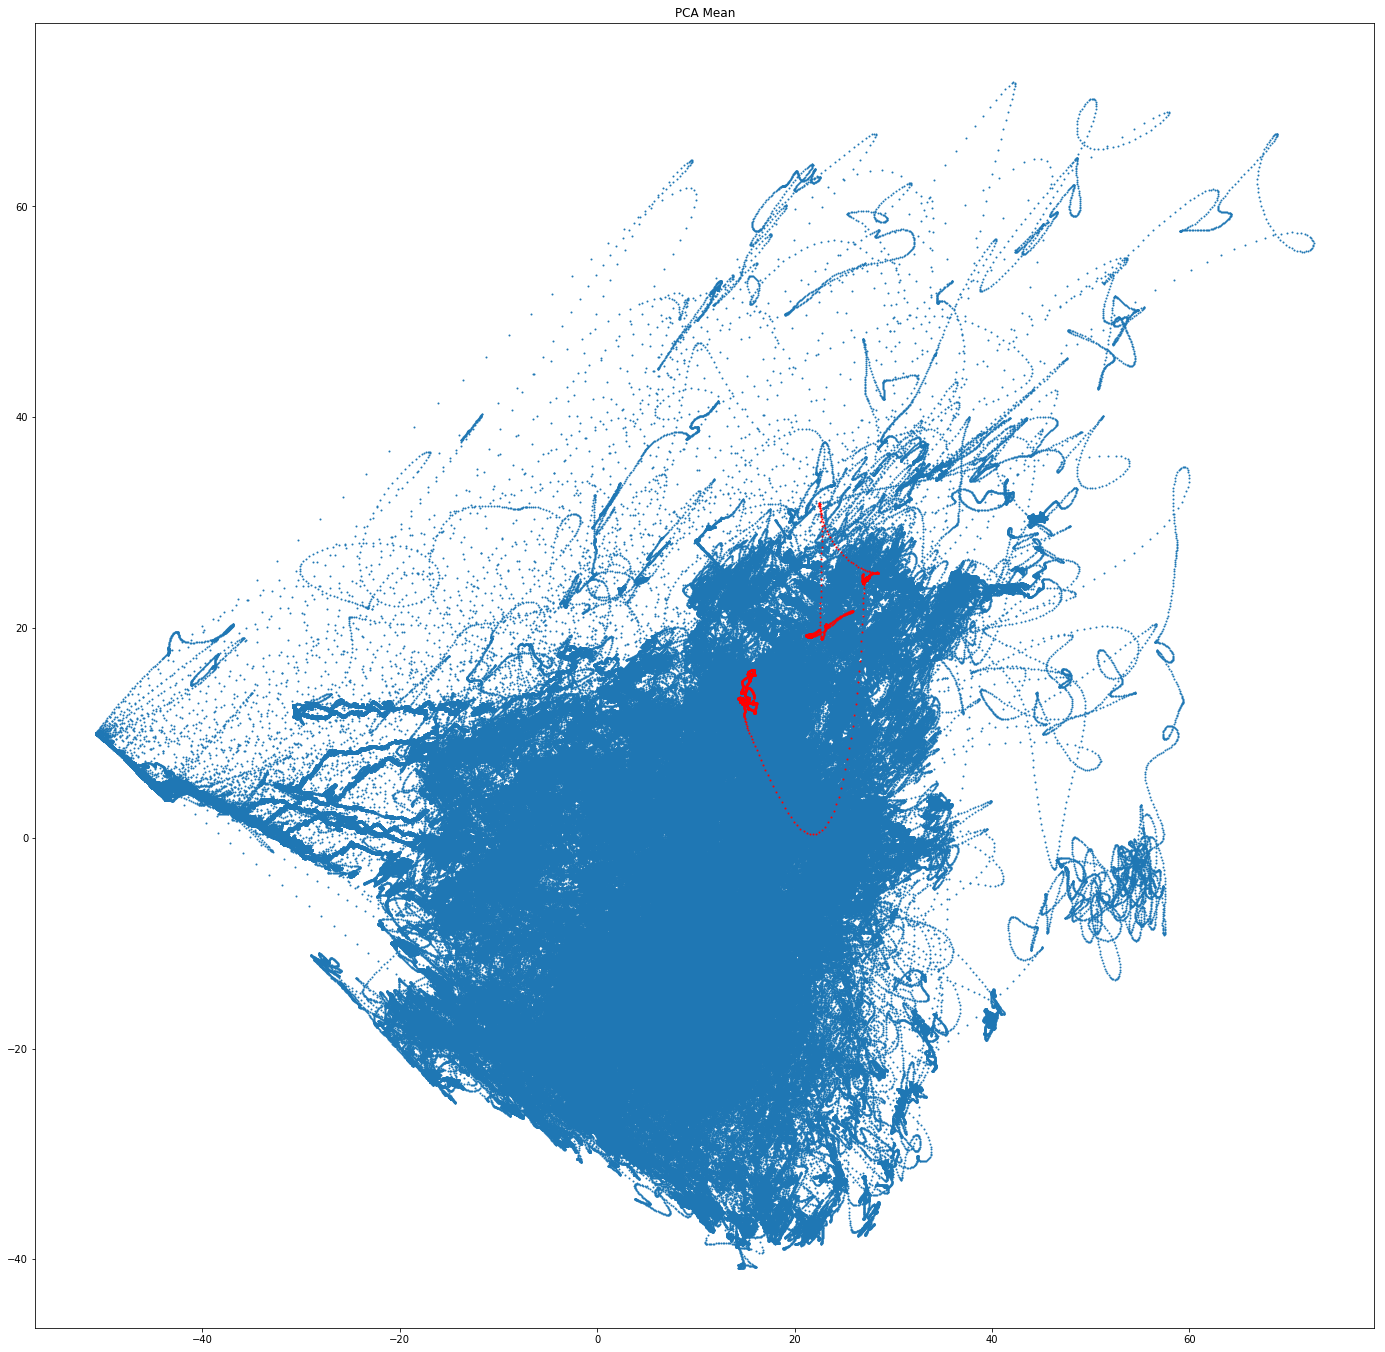

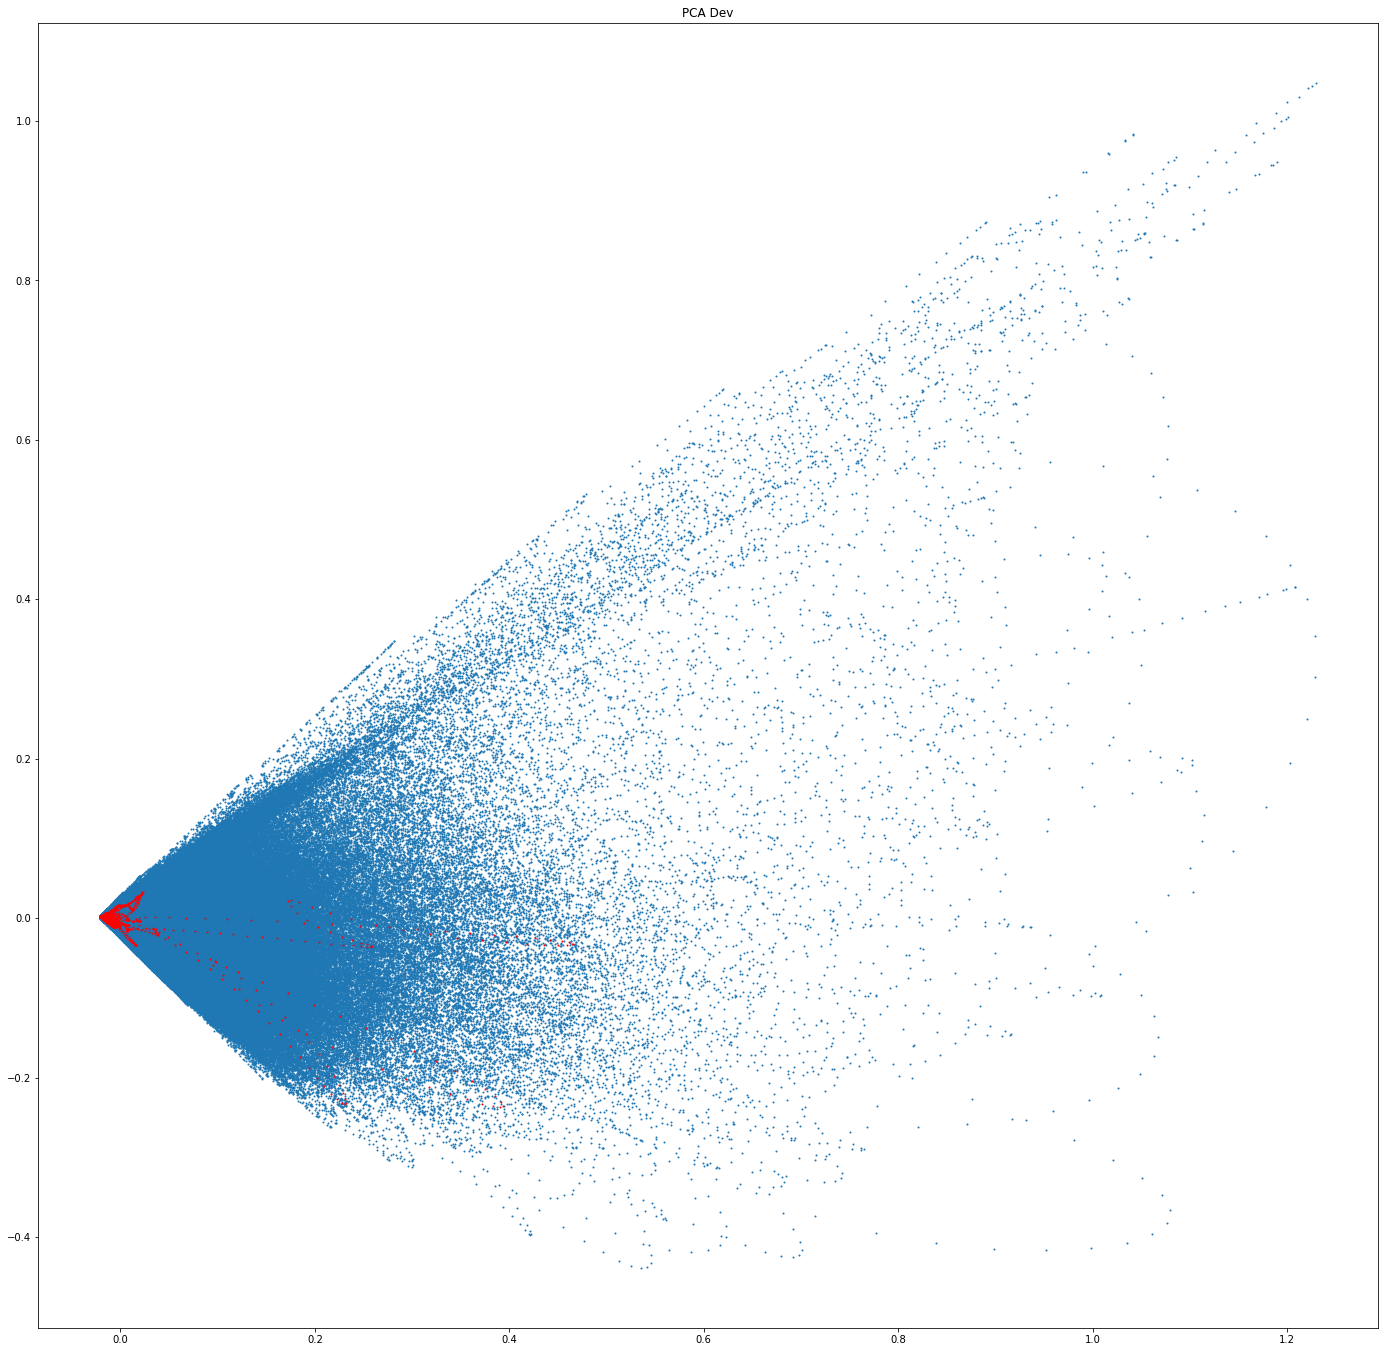

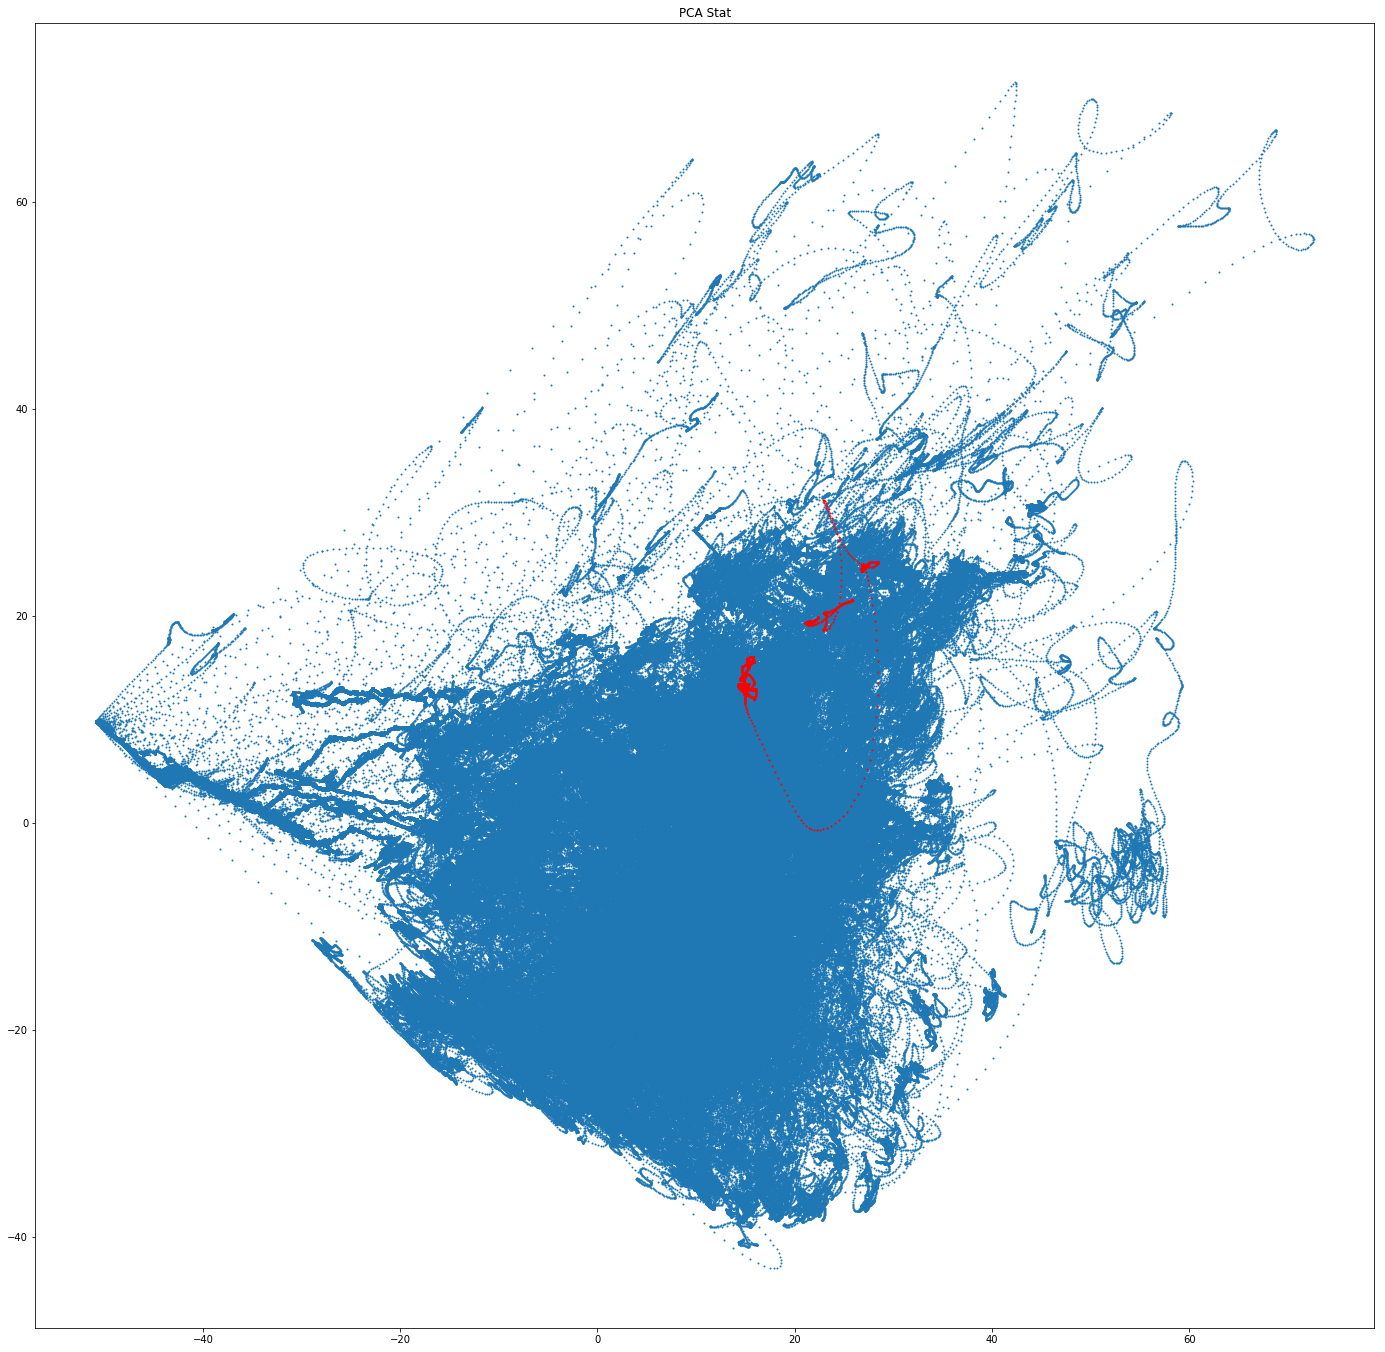

In [18]:
target = dataE.dropna()['target'].values
notTarget = np.logical_not(target)

sct = [pcaM,pcaD,pcaMD]
tit = ['Mean','Dev','Stat']
for i in range(len(sct)):
    pcaSample = sct[i]#sct[i][np.random.choice(sct[i].shape[0], int(4e4), replace=False), :]
    serie = pd.DataFrame(pcaSample)

    X = pd.Series(serie[0]).loc[notTarget]
    Y = pd.Series(serie[1]).loc[notTarget]

    X_t = pd.Series(serie[0]).loc[target]
    Y_t = pd.Series(serie[1]).loc[target]
    
    plt.figure(figsize=(24,24))
    
    plt.scatter(X,Y,s=1)
    plt.scatter(X_t,Y_t,s=1,c='r')
    plt.title('PCA '+tit[i])

#### Tridimencional

In [19]:
data = datos.iloc[:,1:len(datos.columns)-1]
pcaB = PCA(n_components=3).fit_transform(data)

Text(0.5, 0.92, 'PCA Raw')

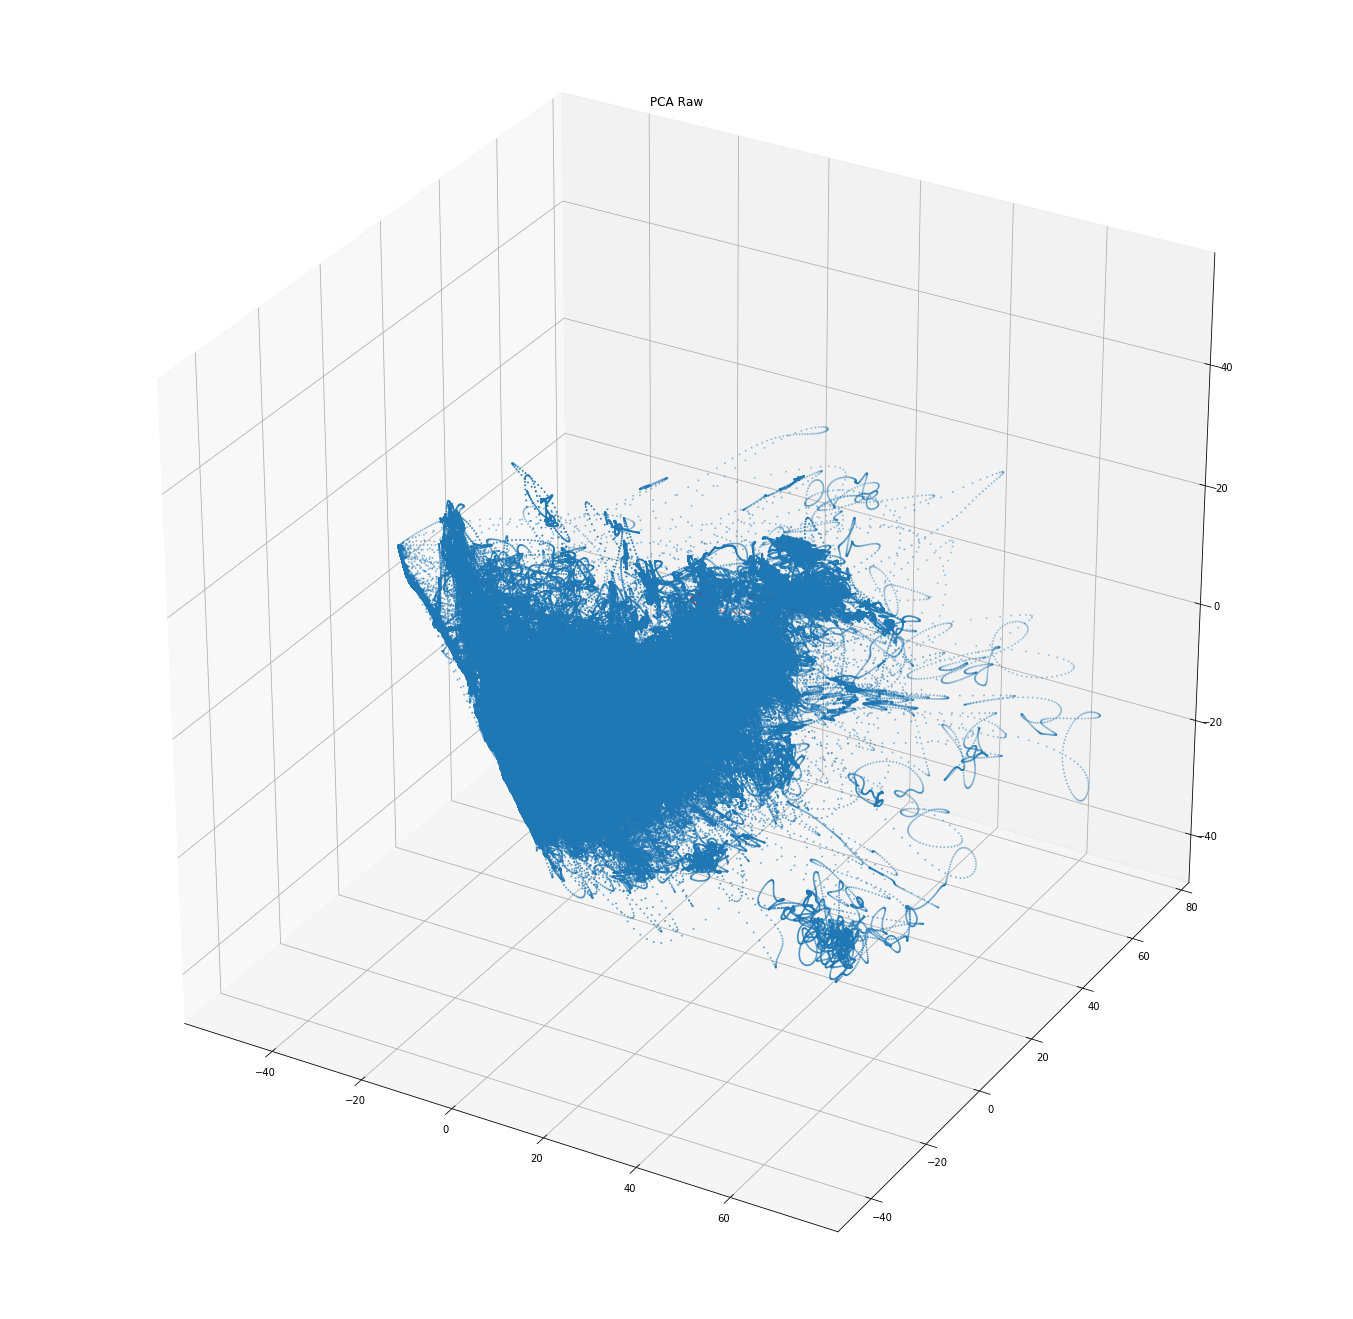

In [20]:
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(111, projection='3d')

pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]
Z = pd.Series(serie[2]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]
Z_t = pd.Series(serie[2]).loc[target]

ax.scatter(X,Y,Z,s=1)
ax.scatter(X_t,Y_t,Z_t,s=1,c='r')
plt.title('PCA Raw')